# Attention is all you need!!

1. `Seq2Seq Modelling and Attention` - A Seq2Seq model takes an input a sequence, and outputs another (like, words, letters or even time series). For e.g., an input of a sentence in German and output sentence in English. A natural choice for such tasks(Neural Machine Translation) is as LSTMs. But they come with their own disadvantages. So the paper [Attention is all you need](https://arxiv.org/abs/1706.03762) describes Transformers. But first, Seq2Seq. Seq2Seq model consists of an Encoder and a Decoder. Encoder maps the features to a higher dimension and Decoder maps this output from Encoder to the lower dimension, maybe equal or lower to the input dimension. Let's add another detail to this - **Attention** . Attention mechanism looks at every input sequence at each iteration and decides which other parts of the sequence are important and need to be paid 'attention'.
> For example in machine translation, Attention mechanism takes 2 sentences of different languages, one as row, other as column and then it makes matches, identifying relevant context. 
If done with the same sentence, this is called 'Self-Attention'

  This helps the neural network to identify the 'meaning', identify the noise and relevant parts. This makes it quite different from memory dependent RNNs or proximity based CNNs. Feed forward networks treat features as independent (gender, siblings); convolutional networks focus on relative location and proximity; RNNs and LSTMs have memory limitations and tend to read in one direction. In contrast to these, attention and the transformer can grab context about a word from distant parts of a sentence, both earlier and later than the word appears, in order to encode information to help us understand the word and its role in the system called a sentence. Now what the hell is a Transformer?

2. `Transformer` - The paper [Attention is all you need](https://arxiv.org/abs/1706.03762) shows that an architecture with only attention and without any RNNs, can greatly improve the accuracy of neural machine translation. The paper introduces a novel architecture 'Transformer', which uses the attention mechanism, is made up of encoder and decoder, but doesnt have any RNN units. 

  A visual representation of transformers from the paper - 

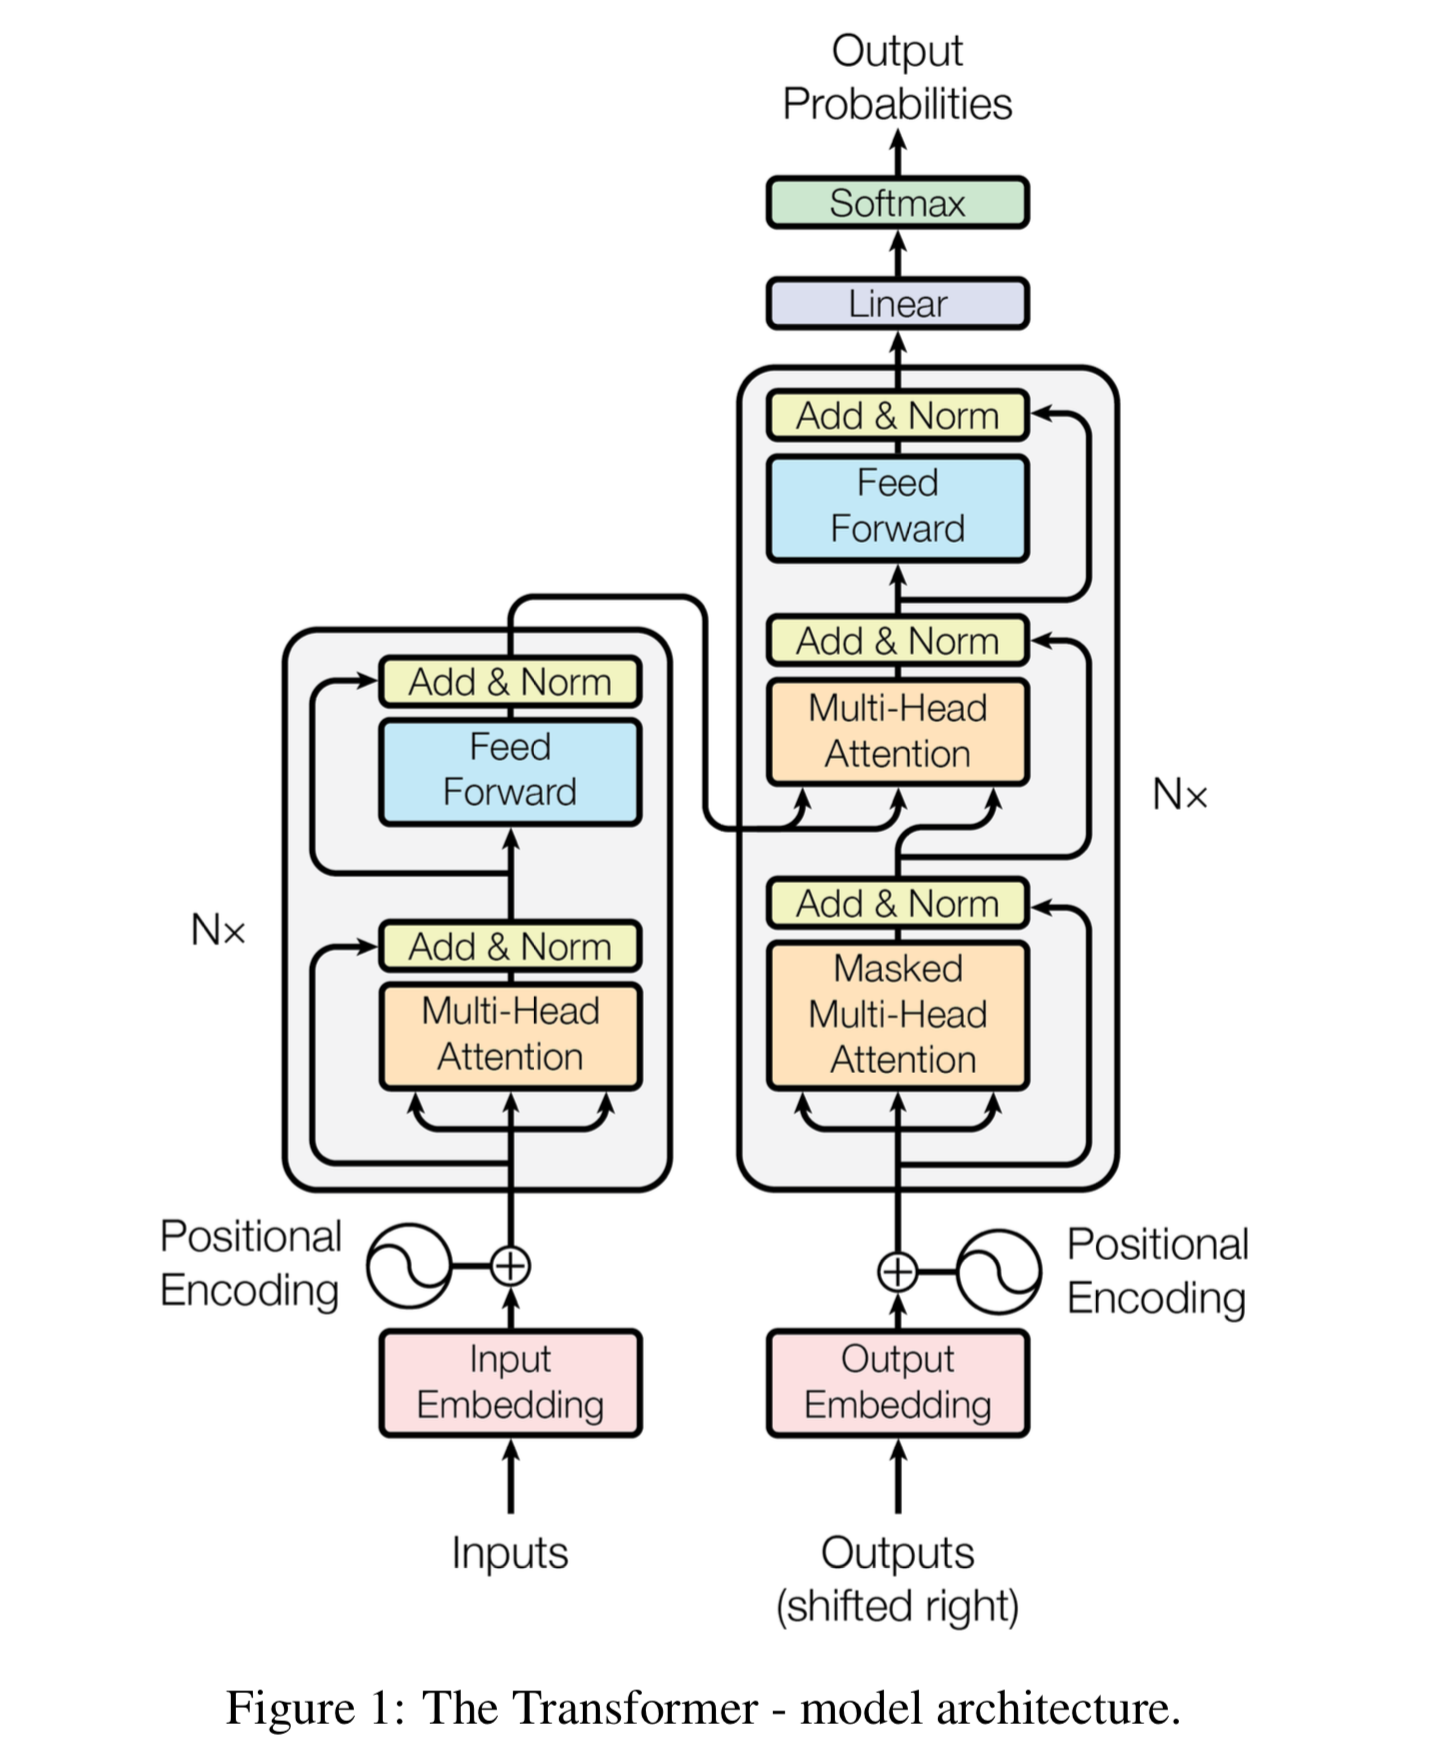


We have Encoder on the left and the decoder on the right. Both of them have components which can be used multiple times and stacked on top of each other. This are given Nx notation in the image. Next component is the Positional encoding. Unlike LSTMs, here we don't remember the how sequences are fed into the model, we need to give every word/part of the sequence an order, or a relative position, since a sequence is depends on the order of it's elements. These positions are added to the word-embedding (n-dimensional representation of the word).

Let's have a closer look at attention and multi-header attention models - 

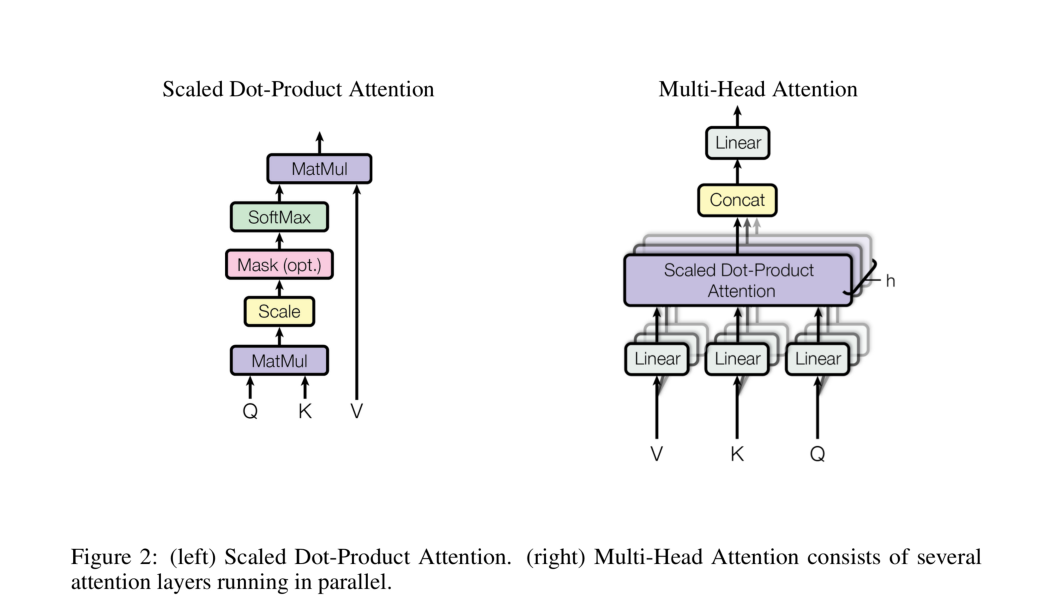

On the left is single attention block and on the right, multiple attention blocks stacked over in parallel. 

Q - Query Vector - Vector representation of 1 word in the sequence

K - Key Vector - Vector representation of all words in the sequence

V - Values - Vector representation of all words in the sequence (Yes, same as K)

Thus, attention is defined as 

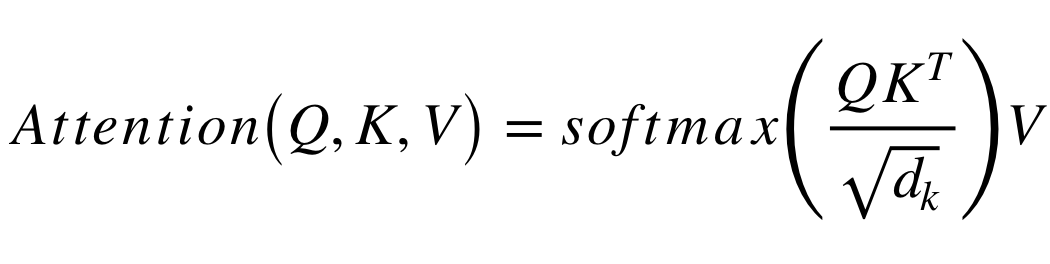

To simplify this a little bit, we could say that the values in V are multiplied and summed with some attention-weights a, where our weights are defined by the softmax term. Bascially, the softmax term is the vector of weights associated with the vector V. This means that the weights a are defined by how each word of the sequence (represented by Q) is influenced by all the other words in the sequence (represented by K). Additionally, the SoftMax function is applied to the weights a to have a distribution between 0 and 1. Those weights are then applied to all the words in the sequence that are introduced in V (same vectors than Q for encoder and decoder but different for the module that has encoder and decoder inputs).

The right hand side shows how this attention block can be parallelised.

After the multi-attention heads in both the encoder and decoder, we have a pointwise feed-forward layer. This little feed-forward network has identical parameters for each position, which can be described as a separate, identical linear transformation of each element from the given sequence.




## Installing required dependencies
In order to import the TensorFlow modules, we must make sure that TF2 is installed in the environment.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 5.0 MB/s 
     |████████████████████████████████| 636 kB 51.8 MB/s 
     |████████████████████████████████| 895 kB 39.7 MB/s 
     |████████████████████████████████| 3.3 MB 38.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Initializing the pre-trained models

Let's initialize the models with pre-trained weights. The list of pre-trained weights is available in [the official documentation](https://huggingface.co/transformers/pretrained_models.html). Downloading the weights may take a bit of time, but it only needs to be done once!

Models get trained on the data, learn the data, convert the words into numbers and save as vocab, or dict. So generally, pre-trained models come with their own vocabulary and their own tokenizer. Some models like BERT do provide options to 'add' to the vocab, but the performance will be case-dependent. 

`Roberta` - Bidirectional Encoder Representations from Transformers, or BERT, is a revolutionary self-supervised pretraining technique that learns to predict intentionally hidden (masked) sections of text. Crucially, the representations learned by BERT have been shown to generalize well to downstream tasks, and when BERT was first released in 2018 it achieved state-of-the-art results on many NLP benchmark datasets.

RoBERTa builds on BERT’s language masking strategy and modifies key hyperparameters in BERT, including removing BERT’s next-sentence pretraining objective, and training with much larger mini-batches and learning rates. RoBERTa was also trained on an order of magnitude more data than BERT, for a longer amount of time. This allows RoBERTa representations to generalize even better to downstream tasks compared to BERT. ----- [Source](https://pytorch.org/hub/pytorch_fairseq_roberta/)

In [3]:
from transformers import TFBertForSequenceClassification, BertTokenizer, TFRobertaForSequenceClassification, RobertaTokenizer

# Initialize Cased BERT and it's tokenizer
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-cased")
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

# Initialize Base Roberta
roberta_model = TFRobertaForSequenceClassification.from_pretrained("roberta-base")
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Tokenization

BERT and RoBERTa are both Transformer models that have the same architecture. As such, they accept only a certain kind of inputs: vectors of integers, each value representing a token. Each string of text must first be converted to a list of indices to be fed to the model. The tokenizer takes care of that for us.

BERT and RoBERTa may have the same architecture, but they differ in tokenization. BERT uses a sub-word tokenization, whereas RoBERTa uses the same tokenization than GPT-2: byte-level byte-pair-encoding. Let's see what this means:

In [6]:
sample_sequence = "Old Trafford is where football lives. Manchester United is love ❤️!"

bert_tokenized_sequence = bert_tokenizer.tokenize(sample_sequence)
roberta_tokenized_sequence = roberta_tokenizer.tokenize(sample_sequence)

print("BERT:", bert_tokenized_sequence)
print("RoBERTa:", roberta_tokenized_sequence)

BERT: ['Old', 'T', '##rafford', 'is', 'where', 'football', 'lives', '.', 'Manchester', 'United', 'is', 'love', '[UNK]', '!']
RoBERTa: ['Old', 'ĠTrafford', 'Ġis', 'Ġwhere', 'Ġfootball', 'Ġlives', '.', 'ĠManchester', 'ĠUnited', 'Ġis', 'Ġlove', 'ĠâĿ', '¤', 'ï¸ı', '!']


####**BERT Tokenizer**

Here, the BERT tokenizer splits the string into multiple substrings. If the substrings are in its vocabulary, they will stay as is: this is the case for `where`, `football` and `lives`. However, if a resulting string is not in its vocabulary, it will be split again until every string is represented by its vocabulary. For example, `Trafford` is split multiple times until every token is represented in the BERT vocabulary: it is split into four tokens. The BERT tokenizer is lacking when it comes to complex characters spread over multiple bytes, as can be seen with emojis. In the sequence used, an emoji of a heart was added. As the BERT tokenizer cannot interpret this emoji on a byte-level, it replaces it by the unknown token [UNK].

####RoBERTa Tokenizer

On the other hand, the RoBERTa tokenizer has a slightly different approach. Here too, the string is split into multiple substrings, which are themselves split into multiple substrings until every substring can be represented by the vocabulary. However, the RoBERTa tokenizer has a byte-level approach. This tokenizer can represent every sequence as a combination of bytes, which makes it shine in the case of complex characters spread over multiple bytes, as with the heart emoji. Instead of using the unknown token, this tokenizer can correctly encode the whale emoji as the combination of multiple bytes. This tokenizer therefore does not require an unknown token, as it can handle every byte separately.